In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# set seaborn style
sns.set(style="whitegrid")

# define a custom color palette
custom_palette = sns.color_palette("Set2")

# Exercise 3
## (a)

the probability of a random variable that follows the Binomial distribution Bin(n, p)
for different p ∈ {0.3, 0.5, 0.8} and n ∈ {10, 50}.


In [3]:
num_samples: int = 100000
p: list = [0.3, 0.5, 0.8]
n: list = [10, 50]

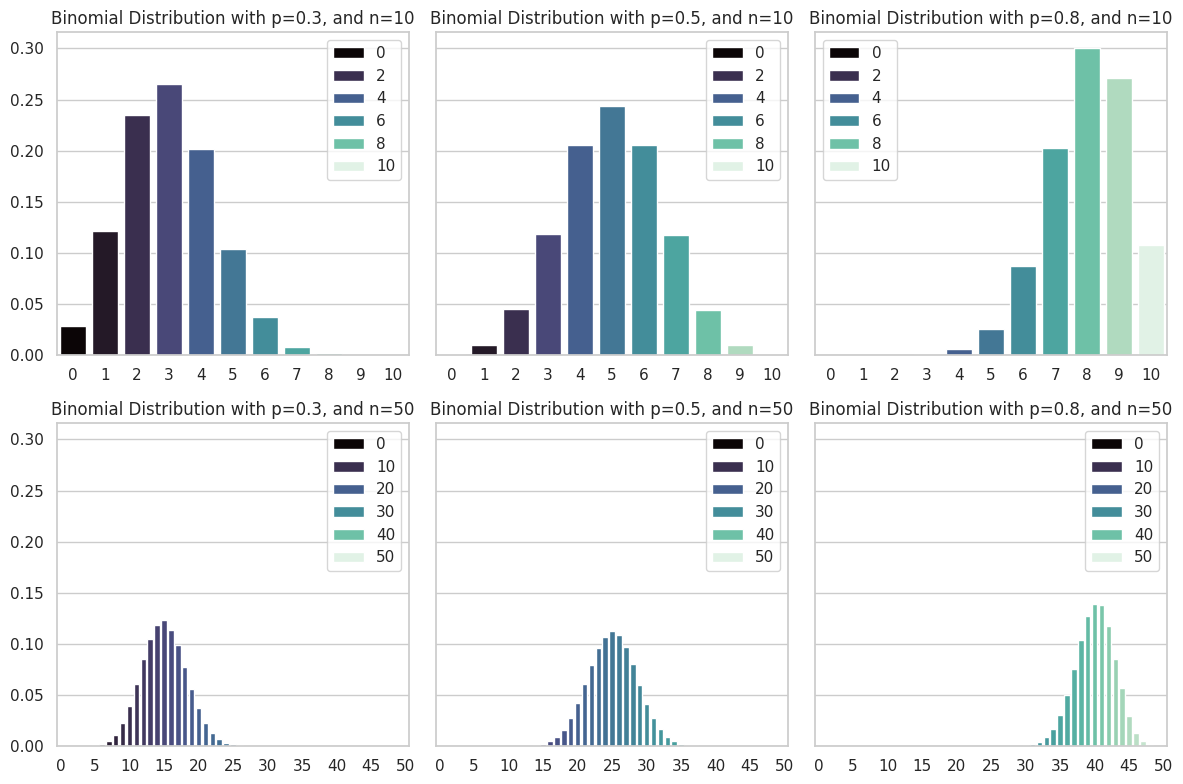

In [4]:
fig, axs = plt.subplots(len(n), len(p), figsize=(12, 8), sharey=True)
for i, _n in enumerate(n):
    for j, _p in enumerate(p):
        # set up x values and empty probabilities
        values = list(range(0, _n + 1))
        probabilities = np.zeros(_n + 1)

        # generate samples
        unique_values, counts = np.unique(np.random.binomial(_n, _p, num_samples), return_counts=True)

        # compute probs
        probabilities[unique_values] = counts/num_samples

        # plot
        sns.barplot(x = values, hue=values, y=probabilities, ax=axs[i, j], palette='mako', legend = True)
        axs[i, j].set_title(f"Binomial Distribution with p={_p}, and n={_n}")

        # adjust x ticks when n = 50
        if _n == 50:
            axs[i, j].set_xticks(list(range(0, _n + 1, 5)))
            axs[i, j].set_xticklabels(list(range(0, _n + 1, 5)))
plt.tight_layout()
plt.show()


## (b) 
the probability of a random variable that follows the Geometric distribution Geom(p)
and the corresponding cumulative distribution function F for different p ∈ {0.3, 0.5, 0.8}
for all x ≤ 11.

In [5]:
p: list = [0.3, 0.5, 0.8]
size=num_samples

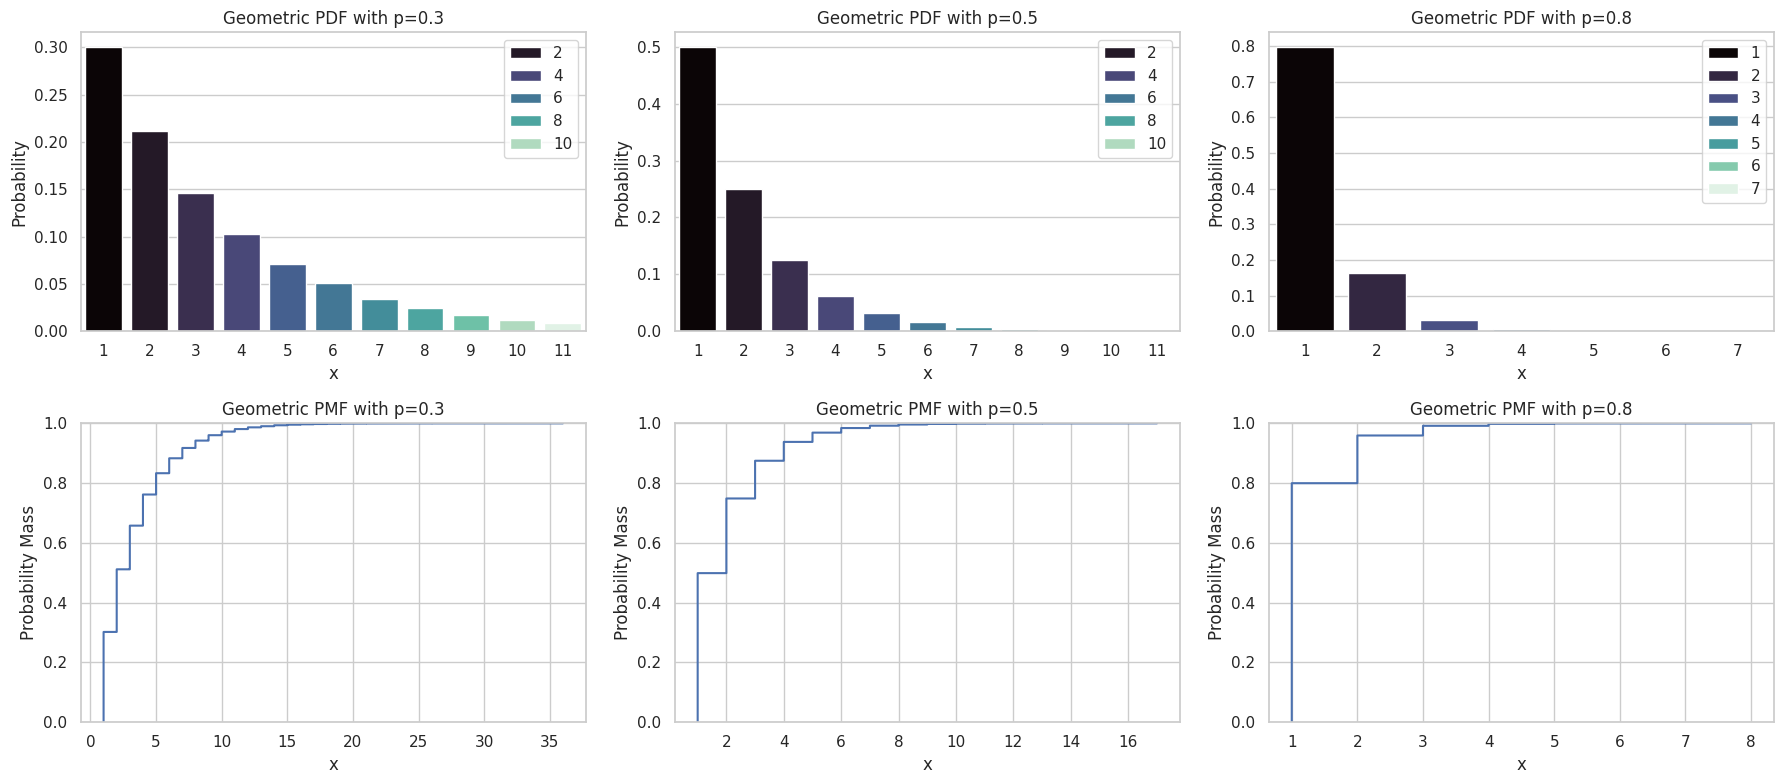

In [6]:
fig, axs = plt.subplots(2, len(p), figsize=(18, 8))
for j, _p in enumerate(p):
    values, counts = np.unique(np.random.geometric(_p, size), return_counts=True)

    # cut to be smaller 11
    counts = counts[values <= 11]
    values = values[values <= 11]

    sns.barplot(x=values,hue = values, y=counts/size, ax=axs[0, j], palette = 'mako')
    axs[0, j].set_title(f"Geometric PDF with p={_p}")
    axs[0, j].set_ylabel("Probability")
    axs[0, j].set_xlabel("x")

    sns.ecdfplot(np.random.geometric(_p, size), ax=axs[1, j], drawstyle='steps-pre')
    axs[1, j].set_title(f"Geometric PMF with p={_p}")
    axs[1, j].set_ylabel("Probability Mass")
    axs[1, j].set_xlabel("x")

plt.tight_layout()

## (c)
the probability of a random variable that follows the Poisson distribution for different
λ ∈ {0.3, 2, 6} for x ≤ 16.

In [7]:
lambdas: list = [0.3, 2, 6]

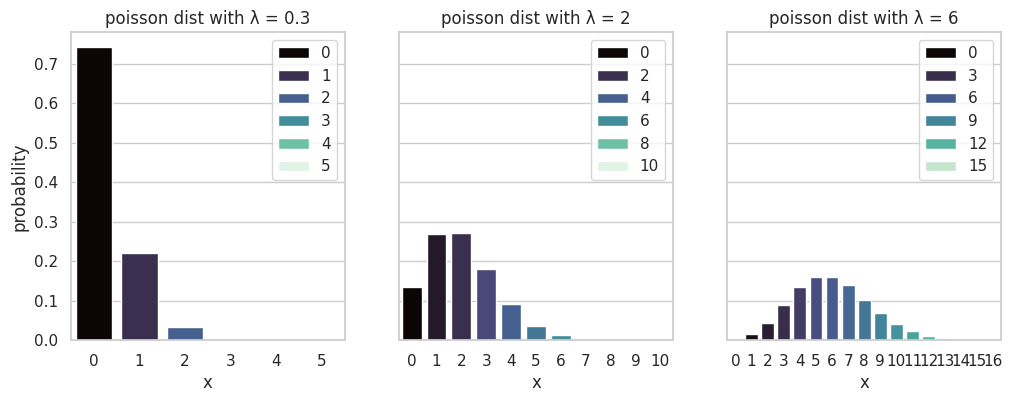

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
for j, l in enumerate(lambdas):
    values, counts = np.unique(np.random.poisson(l, size), return_counts=True)

    # cut x to <= 16
    counts = counts[values <= 16]
    values = values[values <= 16]

    sns.barplot(x=values,hue = values, y=counts/size, ax=axs[j], palette='mako')
    axs[j].set_title(f"poisson dist with λ = {l}")
    axs[j].set_ylabel(f"probability")
    axs[j].set_xlabel(f"x")